**Image classifir**

Local binary search is a image texture classification algorithm which transform an image in to a pattern sequence whcih identtfy intensity texture pattern and identtify simlarties of images

In [ ]:
#libararies
from skimage.color import rgb2gray
from skimage import io     
#from skimage import imag_as_float 
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
from numpy import asarray
from mpl_toolkits.mplot3d import Axes3D


**Use of clustering algorithm to identify the differnce of**

---




In [ ]:

print(pic.shape)
plt.imshow(pic)

pixels = asarray(image)
# confirm pixel range is 0-255
print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
# convert from integers to floats
pixels = pixels.astype('float32')
# normalize to the range 0-1
pixels /= 255.0
# confirm the normalization
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

In [ ]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

**RGB divition using split** 






In [ ]:
r, g, b = cv2.split(image)
r = r.flatten()
g = g.flatten()
b = b.flatten()

In [ ]:
#plotting 
fig = plt.figure(figsize=(100,100))
ax = Axes3D(fig)
ax.scatter(r, g, b)
ax.set_xlabel('r')
ax.set_ylabel('g')
ax.set_zlabel('b')
plt.show()

In [ ]:
import cv2
from sklearn.cluster import KMeans

class DominantColors:

    CLUSTERS = None
    IMAGE = None
    COLORS = None
    LABELS = None
    
    def __init__(self, image, clusters=3):
        self.CLUSTERS = clusters
        self.IMAGE = image
        
    def dominantColors(self):
    
        #read image
        img = cv2.imread(self.IMAGE)
        
        #convert to rgb from bgr
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        
        #save image after operations
        self.IMAGE = img
        
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS)
        kmeans.fit(img)
        
        #the cluster centers are our dominant colors.
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
        
        #returning after converting to integer from float
        return self.COLORS.astype(int)
        
    def rgb_to_hex(self, rgb):
        return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))
    
    def plotClusters(self):
        #plotting 
        fig = plt.figure()
        ax = Axes3D(fig)        
        for label, pix in zip(self.LABELS, self.IMAGE):
            ax.scatter(pix[0], pix[1], pix[2], color = self.rgb_to_hex(self.COLORS[label]))
        plt.show()

In [ ]:
img = '/content/drive/My Drive/canopyPics/img_1.png'
clusters = 2
dc = DominantColors(img, clusters) 
colors = dc.dominantColors()
dc.plotClusters()

print(colors)

**the picture back from the cluster created**

In [ ]:
dc.rgb_to_hex(rgb)

In [ ]:
class DominantColors:
    def rgb_to_hex(self, rgb):
        return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))
    
    def plotClusters(self):
        #plotting 
        fig = plt.figure()
        ax = Axes3D(fig)        
        for label, pix in zip(self.LABELS, self.IMAGE):
            ax.scatter(pix[0], pix[1], pix[2], color = self.rgb_to_hex(self.COLORS[label]))
        plt.show()

In [ ]:
img = '/content/drive/My Drive/canopyPics/img_1.png'
clusters = 5
dcc = DominantColors()
colors = dcc.dominantColors()
dcc.plotClusters()

**Local Binary Pattern for texture classification**

---



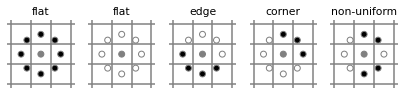

In [7]:
METHOD = 'uniform'
plt.rcParams['font.size'] = 9

def plot_circle(ax, center, radius, color):
    circle = plt.Circle(center, radius, facecolor=color, edgecolor='0.5')
    ax.add_patch(circle)

def plot_lbp_model(ax, binary_values):
    """Draw the schematic for a local binary pattern."""
    # Geometry spec
    theta = np.deg2rad(45)
    R = 1
    r = 0.15
    w = 1.5
    gray = '0.5'

    # Draw the central pixel.
    plot_circle(ax, (0, 0), radius=r, color=gray)
    # Draw the surrounding pixels.
    for i, facecolor in enumerate(binary_values):
        x = R * np.cos(i * theta)
        y = R * np.sin(i * theta)
        plot_circle(ax, (x, y), radius=r, color=str(facecolor))

    # Draw the pixel grid.
    for x in np.linspace(-w, w, 4):
        ax.axvline(x, color=gray)
        ax.axhline(x, color=gray)

    # Tweak the layout.
    ax.axis('image')
    ax.axis('off')
    size = w + 0.2
    ax.set_xlim(-size, size)
    ax.set_ylim(-size, size)


fig, axes = plt.subplots(ncols=5, figsize=(7, 2))

titles = ['flat', 'flat', 'edge', 'corner', 'non-uniform']

binary_patterns = [np.zeros(8),
                   np.ones(8),
                   np.hstack([np.ones(4), np.zeros(4)]),
                   np.hstack([np.zeros(3), np.ones(5)]),
                   [1, 0, 0, 1, 1, 1, 0, 0]]

for ax, values, name in zip(axes, binary_patterns, titles):
    plot_lbp_model(ax, values)
    ax.set_title(name)

In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import skimage.feature as ft
from skimage import data


# settings for LBP
METHOD = 'uniform'
P = 16
R = 2
matplotlib.rcParams['font.size'] = 9


def kullback_leibler_divergence(p, q):
    p = np.asarray(p)
    q = np.asarray(q)
    filt = np.logical_and(p != 0, q != 0)
    return np.sum(p[filt] * np.log2(p[filt] / q[filt]))


def match(refs, img):
    best_score = 10
    best_name = None
    lbp = ft.local_binary_pattern(img, P, R, METHOD)
    hist, _ = np.histogram(lbp, normed=True, bins=P + 2, range=(0, P + 2))
    for name, ref in refs.items():
        ref_hist, _ = np.histogram(ref, normed=True, bins=P + 2,
                                   range=(0, P + 2))
        score = kullback_leibler_divergence(hist, ref_hist)
        if score < best_score:
            best_score = score
            best_name = name
    return best_name


brick = data.load('brick.png')
grass = data.load('grass.png')
wall = data.load('rough-wall.png')

refs = {
    'brick': ft.local_binary_pattern(brick, P, R, METHOD),
    'grass': ft.local_binary_pattern(grass, P, R, METHOD),
    'wall': ft.local_binary_pattern(wall, P, R, METHOD)
}

# classify rotated textures
print ('Rotated images matched against references using LBP:'
print 'original: brick, rotated: 30deg, match result:',
print match(refs, nd.rotate(brick, angle=30, reshape=False))
print 'original: brick, rotated: 70deg, match result:',
print match(refs, nd.rotate(brick, angle=70, reshape=False))
print 'original: grass, rotated: 145deg, match result:',
print match(refs, nd.rotate(grass, angle=145, reshape=False))

# plot histograms of LBP of textures
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3,
                                                       figsize=(9, 6))
plt.gray()

ax1.imshow(brick)
ax1.axis('off')
ax4.hist(refs['brick'].ravel(), normed=True, bins=P + 2, range=(0, P + 2))
ax4.set_ylabel('Percentage')

ax2.imshow(grass)
ax2.axis('off')
ax5.hist(refs['grass'].ravel(), normed=True, bins=P + 2, range=(0, P + 2))
ax5.set_xlabel('Uniform LBP values')

ax3.imshow(wall)
ax3.axis('off')
ax6.hist(refs['wall'].ravel(), normed=True, bins=P + 2, range=(0, P + 2))

plt.show()

SyntaxError: ignored

plt.imshow(lbp)

In [45]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import skimage.feature as ft
from skimage import data


# settings for LBP
METHOD = 'uniform'
P = 16 # 
R = 2 # Radius
matplotlib.rcParams['font.size'] = 9


def kullback_leibler_divergence(p, q):
    p = np.asarray(p) # convert the list to array
    q = np.asarray(q) # convert the list to array
    filt = np.logical_and(p != 0, q != 0)  # Give true or false to p != 0 q != 0
    return np.sum(p[filt] * np.log2(p[filt] / q[filt]))


def match(refs, img):
    best_score = 10
    best_name = None
    lbp = ft.local_binary_pattern(img, P, R, METHOD)
    hist, _ = np.histogram(lbp, normed=True, bins=P + 2, range=(0, P + 2))
    for name, ref in refs.items():
        ref_hist, _ = np.histogram(ref, normed=True, bins=P + 2,
                                   range=(0, P + 2))
        score = kullback_leibler_divergence(hist, ref_hist)
        if score < best_score:
            best_score = score
            best_name = name
    return best_name


brick = data.load('brick.png')
grass = data.load('grass.png')
#wall = data.load('rough-wall.png')
wall = rgb2gray(image)

#plt.imshow(brick)




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: This function is deprecated and will be removed in 0.18. Use `skimage.io.load` or `imageio.imread` directly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: This function is deprecated and will be removed in 0.18. Use `skimage.io.load` or `imageio.imread` directly.


In [66]:
 help(ft.local_binary_pattern)

Help on function local_binary_pattern in module skimage.feature.texture:

local_binary_pattern(image, P, R, method='default')
    Gray scale and rotation invariant LBP (Local Binary Patterns).
    
    LBP is an invariant descriptor that can be used for texture classification.
    
    Parameters
    ----------
    image : (N, M) array
        Graylevel image.
    P : int
        Number of circularly symmetric neighbour set points (quantization of
        the angular space).
    R : float
        Radius of circle (spatial resolution of the operator).
    method : {'default', 'ror', 'uniform', 'var'}
        Method to determine the pattern.
    
        * 'default': original local binary pattern which is gray scale but not
            rotation invariant.
        * 'ror': extension of default implementation which is gray scale and
            rotation invariant.
        * 'uniform': improved rotation invariance with uniform patterns and
            finer quantization of the angular space

In [ ]:
plt.imshow(grass)

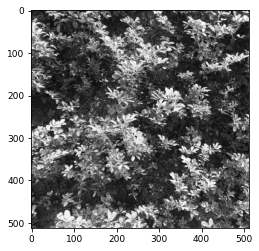

In [55]:
plt.imshow(wall)

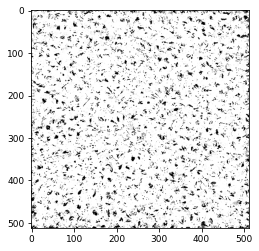

In [69]:
refs = {
    'brick': ft.local_binary_pattern(brick, P, R, METHOD),
    'grass': ft.local_binary_pattern(grass, P, R, METHOD),
    'wall': ft.local_binary_pattern(wall, 50, 10, METHOD)
}

# classify rotated textures
'''print ('Rotated images matched against references using LBP:')
print ('original: brick, rotated: 30deg, match result:')
print (match(refs, nd.rotate(brick, angle=30, reshape=False)))
print ('original: brick, rotated: 70deg, match result:')
print (match(refs, nd.rotate(brick, angle=70, reshape=False)))
print ('original: grass, rotated: 145deg, match result:')
print (match(refs, nd.rotate(grass, angle=145, reshape=False)))'''

plt.imshow(refs['wall'])

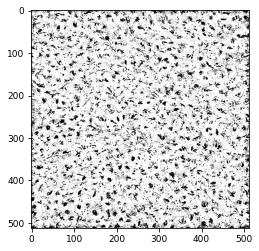

AttributeError: ignored

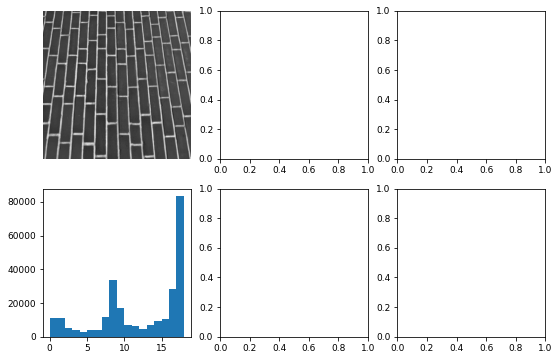

In [42]:
# plot histograms of LBP of textures
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3,
                                                       figsize=(9, 6))
plt.gray()

ax1.imshow(brick)
ax1.axis('off')
ax4.hist(refs['brick'].ravel(), normed=True, bins=P + 2, range=(0, P + 2))
ax4.set_ylabel('Percentage')

ax2.imshow(grass)
ax2.axis('off')
ax5.hist(refs['grass'].ravel(), normed=True, bins=P + 2, range=(0, P + 2))
ax5.set_xlabel('Uniform LBP values')

ax3.imshow(wall)
ax3.axis('off')
ax6.hist(refs['wall'].ravel(), normed=True, bins=P + 2, range=(0, P + 2))

plt.show()

Local binary pattern testing

**Multi_otsu Threshholding**

```
# Deviding the picture according to the threshholds
```


---





In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage.filters import threshold_multiotsu

Creating multiple image senario for testing otsu theory

In [ ]:
# The input image 1
image = plt.imread('/content/drive/My Drive/canopyPics/img_1.png')
plt.imshow(image)

In [ ]:
# The input image 2
image = data.camera()
plt.imshow(image)

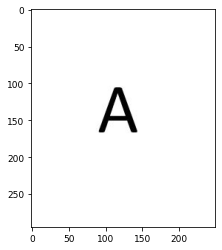

In [ ]:
# The input image 3
Aimage = plt.imread('/content/drive/My Drive/canopyPics/A.JPG')
image = Aimage
plt.imshow(Aimage)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [201 201 201]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


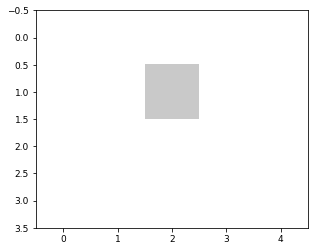

In [ ]:
# The input image 4 ( creating a 4 by 4 pixel array)
IMG_SIZE = 5
image = cv2.resize(image, (IMG_SIZE, 4))
print(image)
plt.imshow(image)


[201 202]


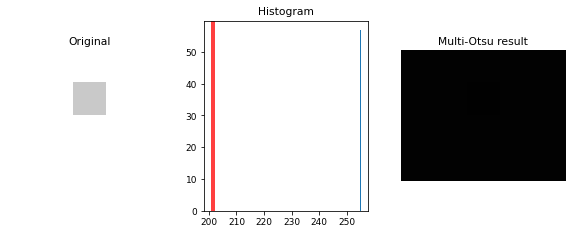

In [ ]:
# Setting the font size for all plots.
matplotlib.rcParams['font.size'] = 9

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)
print(thresholds)
# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='Accent')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

In [ ]:
print(thresholds)
plt.imshow(thresholds)